In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import astropy.units as u
from astropy.visualization import quantity_support
from astroduet.config import Telescope
from astroduet.utils import panstarrs_to_duet

import matplotlib.pyplot as plt
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [15,8]
plotcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
duet = Telescope()

In [4]:
# Load your table with PanSTARRS magnitudes. Each line must have:
# gMeanPSFMag, gMeanPSFMagErr, rMeanPSFMag, rMeanPSFMagErr, iMeanPSFMag, iMeanPSFMagErr, zMeanPSFMag, zMeanPSFMagErr, yMeanPSFMag, yMeanPSFMagErr
# Or whatever other magnitude you prefer, but it must be magnitudes.
stars = np.loadtxt('pstest_sorted.asc')

In [8]:
# Run panstarrs_to_duet; output is a table with g_mag, r_mag (from panstarrs), DUET1 fluence, DUET2 fluence
# as well as badstars (number of stars with only 2 or less good magnitudes) and badfits (number of stars for which 
# the fit failed)
tab, badstars, badfits = panstarrs_to_duet(stars, duet=duet)

/Users/mheida/scripts/git/duet-astro/astroduet/utils.py:599: RuntimeWarning: divide by zero encountered in true_divide
  snrs = 1./(10.**(magerrs[valid]/2.5) - 1.)
/Users/mheida/software/miniconda2/envs/duet/lib/python3.6/site-packages/scipy/optimize/minpack.py:728: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/mheida/software/miniconda2/envs/duet/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [9]:
# Add columns with actual rates
tab['d1_rate'] = duet.fluence_to_rate(tab['d1_fluence'])
tab['d2_rate'] = duet.fluence_to_rate(tab['d2_fluence'])

In [10]:
# Pick your favorite exposure time
exposure = 120*u.s

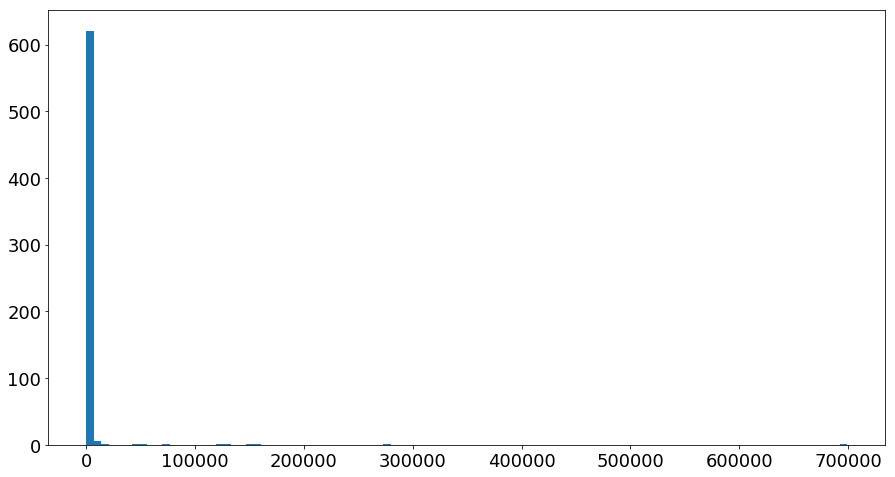

In [14]:
# Maybe plot a histogram?
plt.hist((tab['d1_rate']*exposure).value, bins=100)

plt.show()

In [21]:
# Check how many of your stars are saturated (likely more in D2 than in D1)
len(tab[(tab['d2_rate']*exposure >= 17000 * u.ph)])

18

In [20]:
# Check how many stars were bad
badstars, badfits

(2896, 48)